In [32]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import numpy as np

In [2]:
# import and process data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import seaborn as sns
iris = sns.load_dataset('iris')

In [4]:
# organise the data

# convert from pandas df to tensor
data = torch.tensor(iris[iris.columns[0:4]].values).float()

# transform species to numbers
labels = torch.zeros(len(data), dtype=torch.long)
# labels[iris.species == 'setosa'] = 0 not required as already zeroes are there
labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2

In [27]:
# Create the model
def createModel(nHidden, lr):
    ANNiris = nn.Sequential(
        nn.Linear(4,nHidden),
        nn.ReLU(),
        nn.Linear(nHidden,nHidden),
        nn.ReLU(),
        nn.Linear(nHidden,3)
    )

    lossFunction = nn.CrossEntropyLoss() # SoftMax already included in the loss function

    optimizer = torch.optim.SGD(ANNiris.parameters(), lr=lr)

    return ANNiris, lossFunction, optimizer

In [18]:
# train the model

def trainModel(ANNiris, lossFunction, optimizer, epochs):

    for epoch in range(epochs):
        yHat = ANNiris(data)
        loss = lossFunction(yHat, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    predictions = ANNiris(data)
    predictedLabels = torch.argmax(predictions, axis=1)
    totalAcc = torch.mean((predictedLabels==labels).float())*100
    return totalAcc

In [21]:
def plot(finalAcc):
    fig, ax = plt.subplots(1,figsize=(12,6))
    ax.plot(finalAcc, 'ko-', markerfacecolor='w', markersize=9)
    ax.plot()
    ax.set_xlabel('Accuracy')
    ax.set_xlabel('Number of hidden units')
    ax.set_title('Accuracies')
    plt.show()

### With 150 epochs and 0.01 lr

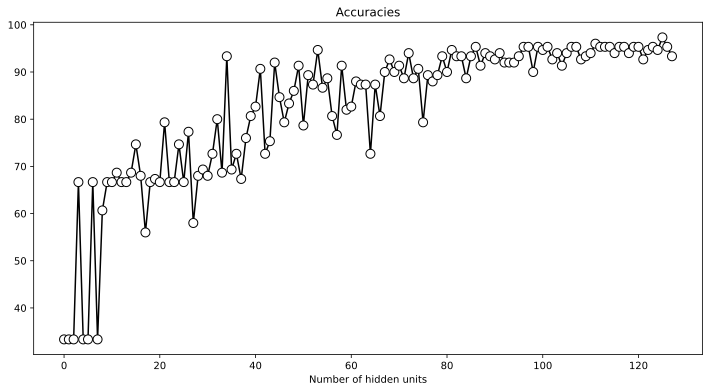

In [39]:
finalAcc = []
epochs = 150
for n in range(128):
    ANNiris, lossFunction, optimizer = createModel(n+1, 0.01)
    finalAcc.append(trainModel(ANNiris, lossFunction, optimizer, epochs))
plot(finalAcc) # with 150 epochs

### With 500 epochs and 0.01 lr

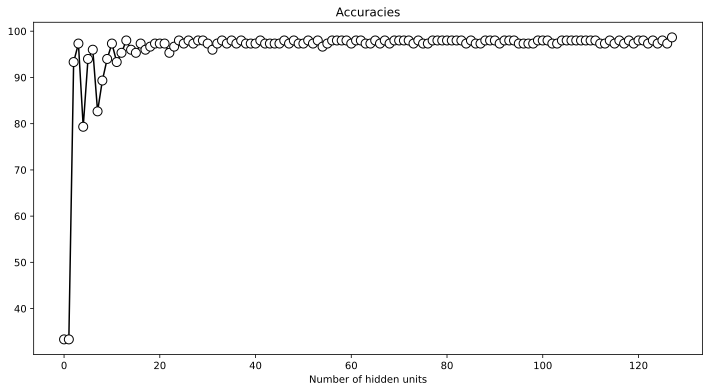

In [38]:
finalAcc = []
epochs = 500
for n in range(128):
    ANNiris, lossFunction, optimizer = createModel(n+1, 0.01)
    finalAcc.append(trainModel(ANNiris, lossFunction, optimizer, epochs))
plot(finalAcc)

# accuracies of models with less number of hidden units increased on increasing the number of training epochs. 

### With 150 epochs and 0.1 lr

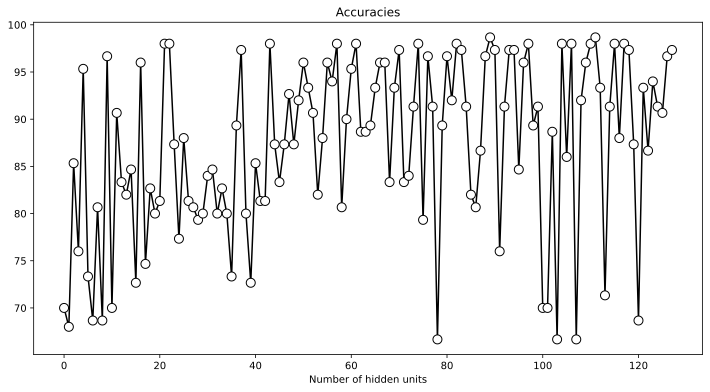

In [37]:
finalAcc = []
epochs = 150
for n in range(128):
    ANNiris, lossFunction, optimizer = createModel(n+1, 0.1)
    finalAcc.append(trainModel(ANNiris, lossFunction, optimizer, epochs))
plot(finalAcc)

### With 150 epochs and 0.001 lr

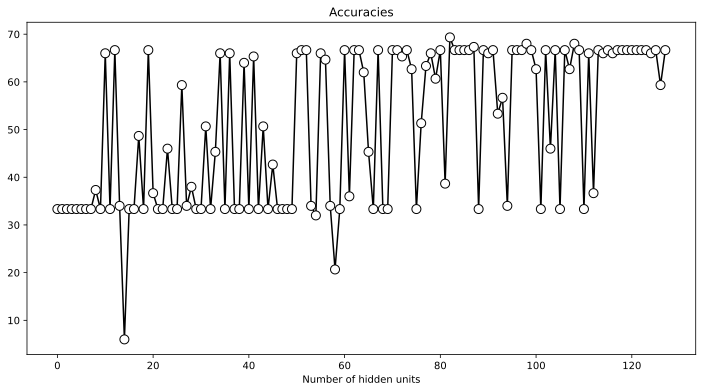

In [36]:
finalAcc = []
epochs = 150
for n in range(128):
    ANNiris, lossFunction, optimizer = createModel(n+1, 0.001)
    finalAcc.append(trainModel(ANNiris, lossFunction, optimizer, epochs))
plot(finalAcc)

### With 150 epochs and 0.01 lr. 14 Hidden units linspaced from 1 to 128 

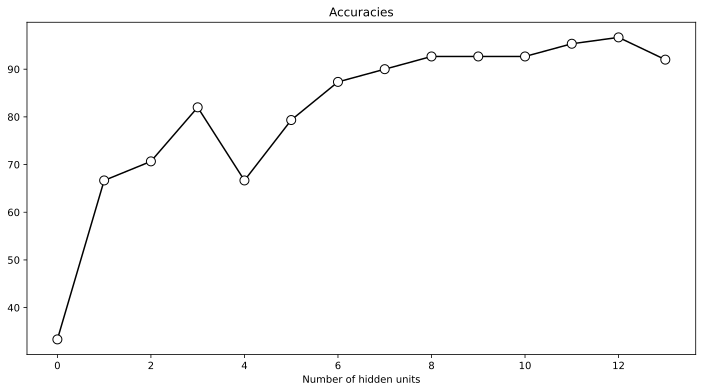

In [47]:
finalAcc = []
epochs = 150
nHidden = (np.linspace(1, 128, 14)).astype(int)
nHidden
for n in nHidden:
    ANNiris, lossFunction, optimizer = createModel(n, 0.01)
    finalAcc.append(trainModel(ANNiris, lossFunction, optimizer, epochs))
plot(finalAcc)